# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

Regional Disparities in Climate Change Awareness: A Case Study in Nepal

This research project aims to investigate the disparities in climate change awareness across different geographical regions in Nepal. By analyzing survey data collected through the National Climate Change Impact Survey (NCCIS) in 2016, the study seeks to identify the factors contributing to variations in awareness levels among households. The project seeks to analyze how awareness of climate change varies across different geographical and analytical domains in Nepal and explore the main perceived reasons for climate change within these domains.  Key objectives include examining the relationship between awareness levels and geographical factors, such as altitude, ecological zone, and urbanization status, and exploring potential implications for climate change mitigation and adaptation strategies. 

This research is essential for understanding the current state of climate change awareness and perception in Nepal and can inform future policy interventions and educational initiatives aimed at addressing climate change challenges.

In [ ]:
import pandas as pd

In [53]:
climate_knowledge = pd.read_csv('datasets/householdwhohaveheardaboutclimatechange.csv')
print(climate_knowledge.head()) 

          Category Analytical Domain  Yes(%)  No(%)
0      Urban/Rural             Urban   56.79  43.21
1      Urban/Rural             Rural   46.24  53.76
2  Ecological Belt          Mountain   36.41  63.59
3  Ecological Belt              Hill   49.53  50.47
4  Ecological Belt             Terai   51.35  48.65


In [23]:
perception = pd.read_csv('datasets/perceptiononreasonsofclimatechange.csv')
print(perception.head()) 

          Category Analytical Domain for main reason of Climate Change  \
0     Urban/Rural                                               Urban    
1     Urban/Rural                                               Rural    
2  Ecological belt                                          Mountain     
3  Ecological belt                                             Hill      
4  Ecological belt                                            Terai      

   Deforestation\r\n\n\r\n\n  Industrialisation  Urbanisation  \
0                       62.8               35.0          56.9   
1                       57.6               20.0          18.2   
2                       49.8                4.0          15.3   
3                       48.3               26.7          32.2   
4                       70.8               25.6          29.7   

   Resource exploitation  God's will \n  Natural cause   Earthquake   Others  \
0                   35.4            7.2            34.7          4.6     6.2   
1   

In [25]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

# Filter out rows with missing values
cleaned_df = df.dropna()

# Display the cleaned dataset
print("Cleaned Dataset:")
print(cleaned_df.head())

Missing Data:
Category                                               0
Analytical Domain for main reason of Climate Change    0
Deforestation\r\n\n\r\n\n                              0
Industrialisation                                      0
Urbanisation                                           0
Resource exploitation                                  0
God's will \n                                          0
Natural cause                                          0
Earthquake                                             0
Others                                                 1
Don't know                                             0
dtype: int64
Cleaned Dataset:
          Category Analytical Domain  Yes(%)  No(%)
0      Urban/Rural             Urban   56.79  43.21
1      Urban/Rural             Rural   46.24  53.76
2  Ecological Belt          Mountain   36.41  63.59
3  Ecological Belt              Hill   49.53  50.47
4  Ecological Belt             Terai   51.35  48.65


In [32]:
print(perception.columns)

Index(['Category', 'Analytical Domain for main reason of Climate Change',
       'Deforestation\r\n\n\r\n\n', 'Industrialisation', 'Urbanisation',
       'Resource exploitation', 'God's will \n', 'Natural cause ',
       'Earthquake ', 'Others', 'Don't know'],
      dtype='object')


In [31]:
print(climate_knowledge.columns)

Index(['Category', 'Analytical Domain', 'Yes(%)', 'No(%)'], dtype='object')


In [59]:
# Group by 'Analytical Domain for main reason of Climate Change' and calculate the mean of 'Yes(%)'
pivot_table = perception.groupby('Analytical Domain for main reason of Climate Change')['Deforestation\r\n\n\r\n\n'].mean()

print("Pivot Table - Mean Percentage of Households Who Have Heard About Climate Change:")
print(pivot_table)


Pivot Table - Mean Percentage of Households Who Have Heard About Climate Change:
Analytical Domain for main reason of Climate Change
Central Hill             57.1
Central Mountain         34.9
Central Terai            59.9
Eastern Hill             47.9
Eastern Mountain         14.9
Eastern Terai            74.0
Far-western Hill         87.1
Far-western Mountain     97.3
Far-western Terai        96.8
High                     56.7
Hill                     48.3
Kathmandu Valley         30.0
Low                      71.3
Mid-western Hill         64.2
Mid-western Mountain     66.9
Mid-western Terai        67.3
Moderate                 47.7
Mountain                 49.8
Nepal                    59.1
Rural                    57.6
Sub-alpine                0.0
Sub-tropical             49.6
Temperate                49.0
Terai                    70.8
Tropical                 65.2
Urban                    62.8
Very High                59.8
Very Low                 66.1
Western Hill             25

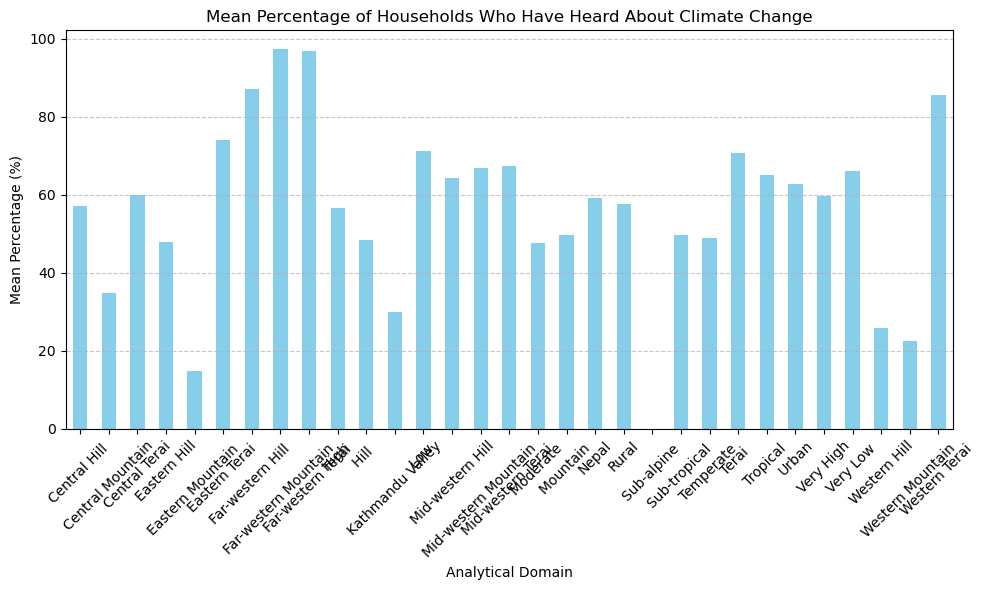

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color='skyblue')
plt.title('Mean Percentage of Households Who Have Heard About Climate Change')
plt.xlabel('Analytical Domain')
plt.ylabel('Mean Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar plot represents the mean percentage of households who have heard about climate change across different analytical domains.

The data reveals variations in awareness levels across different regions or domains.
For instance, areas such as "Eastern Terai," "Far-western Hill," and "Far-western Mountain" exhibit relatively higher levels of awareness compared to others, with mean percentages ranging from approximately 74% to 97%.
Conversely, domains like "Eastern Mountain," "Western Mountain," and "Sub-alpine" show lower awareness levels, with mean percentages close to zero or below 25%.
This analysis suggests that awareness about climate change varies significantly across different geographical regions in Nepal. Understanding these variations can guide targeted interventions and awareness campaigns to enhance climate change education and action in areas with lower awareness levels. Additionally, it underscores the importance of considering regional factors and characteristics when developing climate change mitigation and adaptation strategies.

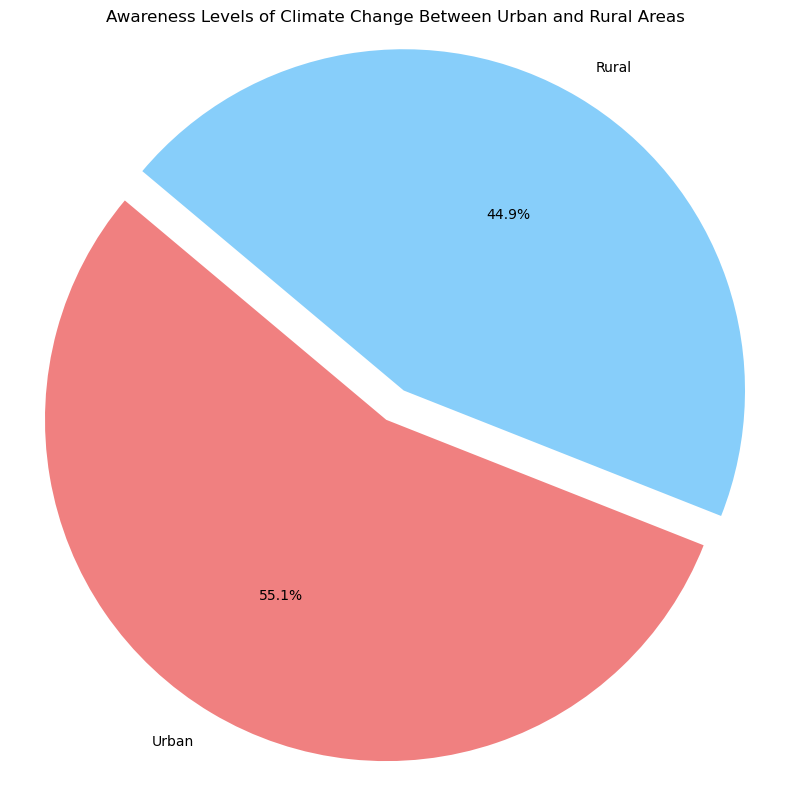

In [57]:
urban_mean_percentage = urban_rural_data[urban_rural_data['Analytical Domain'] == 'Urban']['Yes(%)'].mean()
rural_mean_percentage = urban_rural_data[urban_rural_data['Analytical Domain'] == 'Rural']['Yes(%)'].mean()

plt.figure(figsize=(8, 8))
labels = ['Urban', 'Rural']
sizes = [urban_mean_percentage, rural_mean_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Awareness Levels of Climate Change Between Urban and Rural Areas')
plt.axis('equal')
plt.tight_layout()
plt.show()

The pie chart comparing awareness levels (%) of climate change between urban and rural areas illustrates a notable difference in awareness between these two settings.

In urban areas, the mean percentage of households aware of climate change is relatively higher compared to rural areas. This suggests that urban communities might have better access to information and resources related to climate change, possibly due to higher levels of education, media exposure, or government initiatives focused on urban populations.

Conversely, rural areas show a lower mean percentage of households aware of climate change. This could be attributed to various factors such as limited access to education, communication infrastructure, and lower exposure to climate change-related information. Additionally, the livelihoods and daily concerns of rural communities might prioritize immediate needs over long-term environmental issues.

Research Question: 

What are the main perceived reasons for climate change among different analytical domains in Nepal, and how do these perceptions correlate with the level of awareness about climate change among households?

This research question aims to explore the relationship between perceived reasons for climate change and the awareness levels among households in different analytical domains in Nepal. It seeks to understand if there are variations in perception across different regions and how these perceptions may influence the level of awareness about climate change.


Data Analysis Plan:

Data Exploration: Load the datasets climate_knowledge and perception into Pandas DataFrames.
Explore the structure of the datasets, including the columns, data types, and any missing values.
Examine summary statistics to understand the distribution of variables.

Data Cleaning:
Handle missing values by either removing or imputing them based on the context of the data.
Check for and handle any inconsistencies or anomalies in the data.

Data Integration:
Merge the two datasets (climate_knowledge and perception) based on common columns, such as geographical or analytical domains.

Data Analysis:
Conduct descriptive analysis to summarize the awareness of climate change among different geographical and analytical domains.
Calculate summary statistics, such as mean, median, and standard deviation, for variables related to climate change awareness.
Explore the distribution of awareness percentages across different domains using visualizations like histograms, box plots, or bar charts.

Group Analysis:
Group the data by geographical or analytical domains to analyze differences in climate change awareness.
Calculate aggregated statistics, such as mean awareness percentages, for each group.
Use pivot tables or groupby operations to summarize the data and compare awareness levels across domains.

Perceived Reasons for Climate Change:
Analyze the perception data to identify the main reasons perceived for climate change.
Calculate the average percentage of respondents attributing climate change to different factors, such as deforestation, industrialization, urbanization, etc.
Visualize the perceived reasons for climate change using pie charts, bar plots, or other appropriate visualizations.


Interpretation and Conclusion:
Interpret the findings from the data analysis, discussing key insights and trends observed.
Summarize the implications of the results for policy-making, education, and future research.
Conclude the analysis by addressing the research question and suggesting potential areas for further investigation.